# Notebook Tasks

1. Use the islice from itertools to get the elements of the text [link to library](https://docs.python.org/3/library/itertools.html)
2. Create a dataframe from the `value_at_index` [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
3. Write a `for in` loop with the use of `zip`, to iterate over the pages, the paragraphs and the iteration itself, to create a dataframe out of extracted text [link to documentation](https://docs.python.org/3/library/functions.html#zip)

Text extraction from pdf files with [pdfplumber](https://pypi.org/project/pdfplumber/)

# Imports

In [1]:
# standard imports
import re
import pandas as pd
import numpy as np

# text processing
from itertools import islice
import pdfplumber

#ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

# Helper Functions

Use the [`islice`](https://docs.python.org/3/library/itertools.html#itertools.islice) from `itertools` to get the elements. <br> <br>
Use an iterator for an efficient way to loop over dict.

In [2]:
def nth_key(dict_, n):
    """  Extract text from the nth key of the dictionary """
    # create an iterator from the dictionary
    it = iter(dict_)
    # use the islice function, and the assigned variables with next() function returns the next item from the iterator

    # extract the text from the nth key of the dictionary
    next(islice(it, n, n+1), None)
    
    # return the value at the current position; this raises StopIteration if n is beyond the limits.
    # use next(it, None) to suppress that exception.
    return next(it)




Create a dataframe from the `value_at_index`.

In [3]:
def extract_text(page_no, paragraph):
    """ Extract and clean text from a given paragraph of agiven  page in a pdf file."""
    #  get the objects -text, images from the page with specified page number
    text_dict = pdf.pages[page_no].objects
    # convert the text objects to a list and extract the first element, list of text blooocks
    value_at_index = list(text_dict.values())[0]
    
    # create a dataframe form the list value_at_index, where each row represents a text block
    df = pd.DataFrame(value_at_index)
    sent = df.text[paragraph]
    # remove new lines
    new_str = sent.replace("\n", "")
    # remove "\xa0a"
    new_str = new_str.replace('\xa0a',"")
    # replace a non-braking space character set "\xa0" used in web pages to create a space
    # that woont be  broken by line wrap with  space
    new_str = new_str.replace('\xa0'," ")
    
    return new_str

### Datapath

In [4]:
PATH = 'data/'
FILENAME = 'Apple_Environmental_Progress_Report_2021.pdf'
FILE_DF = 'report_data.csv'

In [5]:
# "Layout Analysis Parameters" is a dictionary of parameters that control the layout analysis setting to 
# "line_overlap": 0.7, means that two characters overlap by 70% or more, they are considered to be part of the same line.
pdf = pdfplumber.open(PATH + FILENAME, laparams = { "line_overlap": 0.7 })

In [6]:
# use the extracting function
text_dict = pdf.pages[9].objects

In [7]:
# show keys of text dictonary
text_dict.keys()

dict_keys(['textboxhorizontal', 'textlinehorizontal', 'char', 'curve', 'line', 'figure'])

In [8]:
nth_key(text_dict, 0)

'textlinehorizontal'

In [9]:
# look at page
value_at_index = list(text_dict.values())[0]
value_at_index

[{'x0': 33.874,
  'y0': 751.1341,
  'x1': 297.1618,
  'y1': 758.3091,
  'width': 263.2878,
  'height': 7.1749999999999545,
  'object_type': 'textboxhorizontal',
  'page_number': 10,
  'text': 'Introduction       Climate Change       Resources       Smarter Chemistry       Appendix\n',
  'top': 33.690900000000056,
  'bottom': 40.86590000000001,
  'doctop': 7161.6909},
 {'x0': 468.8491,
  'y0': 751.1761,
  'x1': 577.9820000000001,
  'y1': 758.3091,
  'width': 109.13290000000006,
  'height': 7.1329999999999245,
  'object_type': 'textboxhorizontal',
  'page_number': 10,
  'text': 'Environmental Progress Report  10\n',
  'top': 33.690900000000056,
  'bottom': 40.82389999999998,
  'doctop': 7161.6909},
 {'x0': 499.1339,
  'y0': 484.1413,
  'x1': 578.7988,
  'y1': 591.3163,
  'width': 79.66490000000005,
  'height': 107.17499999999995,
  'object_type': 'textboxhorizontal',
  'page_number': 10,
  'text': 'Our Green Bond engages \ninvestors in our work \ntoward carbon neutrality. \nIn our 2020 G

In [13]:
example_df_from_page = pd.DataFrame(value_at_index)
example_df_from_page

,x0,y0,x1,y1,width,height,object_type,page_number,text,top,bottom,doctop
0,33.8740,751.1341,297.1618,758.3091,263.2878,7.175,textboxhorizontal,10,Introduction Climate Change Resour...,33.6909,40.8659,7161.6909
1,468.8491,751.1761,577.9820,758.3091,109.1329,7.133,textboxhorizontal,10,Environmental Progress Report 10\n,33.6909,40.8239,7161.6909
2,499.1339,484.1413,578.7988,591.3163,79.6649,107.175,textboxhorizontal,10,Our Green Bond engages \ninvestors in our work...,200.6837,307.8587,7328.6837
3,34.0157,627.3239,184.5557,651.3239,150.5400,24.000,textboxhorizontal,10,Our approach\n,140.6761,164.6761,7268.6761
4,34.0158,560.9733,246.1519,613.9733,212.1361,53.000,textboxhorizontal,10,Climate change is one of the greatest threats ...,178.0267,231.0267,7306.0267
5,34.0158,366.2863,254.2238,546.7863,220.2080,180.500,textboxhorizontal,10,This means the impact of the changes we make—i...,245.2137,425.7137,7373.2137
6,34.0158,251.2863,247.8782,351.2863,213.8624,100.000,textboxhorizontal,10,Our goal and approach are informed by science....,440.7137,540.7137,7568.7137
7,266.5748,595.1428,446.4812,614.6428,179.9064,19.500,textboxhorizontal,10,Our philosophy for achieving carbon neutrality...,177.3572,196.8572,7305.3572
8,266.5748,571.9908,462.8096,580.1428,196.2348,8.152,textboxhorizontal,10,• Taking a comprehensive approach: Our respon...,211.8572,220.0092,7339.8572
9,275.0787,434.1428,485.2323,568.6428,210.1536,134.500,textboxhorizontal,10,extends beyond our direct operations to the en...,223.3572,357.8572,7351.3572


## Create a Dataframe from the Subheadlines

Iterate over the pages, the paragraphs and the iteration itself, to create a dataframe out of extracted text. 

__Note:__ These numbers are from manually skimming the PDF to determine which pages and which part of the pages we need. This procedure is not always necessary, as the documents often have the same layout structure, which makes it easier to find the right part of the document. 

In [10]:
pages = [14, 16, 18, 19, 27, 28, 44, 50, 52]
paragraphs = [7, 7, 3, 3, 3, 3, 3, 3, 4]

# get the number of pages to be iterated over
iter_ = np.arange(len(pages)+1)
#print(f"iter object: {iter_}")
rows = []

# loop over zip() to create a dataframe while using the extract_text() append the text to the rows list
for i, page, paragraph in zip(iter_, pages, paragraphs):
    print(f"iter: {i}, page: {page}, paragraph: {paragraph}")
    rows.append(extract_text(page, paragraph)) 

df = pd.DataFrame(rows, columns=['text'])
df.head()

iter: 0, page: 14, paragraph: 7
iter: 1, page: 16, paragraph: 7
iter: 2, page: 18, paragraph: 3
iter: 3, page: 19, paragraph: 3
iter: 4, page: 27, paragraph: 3
iter: 5, page: 28, paragraph: 3
iter: 6, page: 44, paragraph: 3
iter: 7, page: 50, paragraph: 3
iter: 8, page: 52, paragraph: 4


,text
0,We believe that well-designed products have lo...
1,Our energy efficiency goals extend well beyond...
2,"Last year, one of our manufacturers in Guangzh..."
3,We’re at a pivotal moment in addressing climat...
4,Our goal to reach carbon neutrality by 2030 re...


## Save Dataframe

In [11]:
df.to_csv(PATH + FILE_DF, index=None)

## Additional Material

A good way to visually debug or look at a PDF report, is to use the functions following functions from `pdfplumber`:

In [12]:
page = pdf.pages[9]

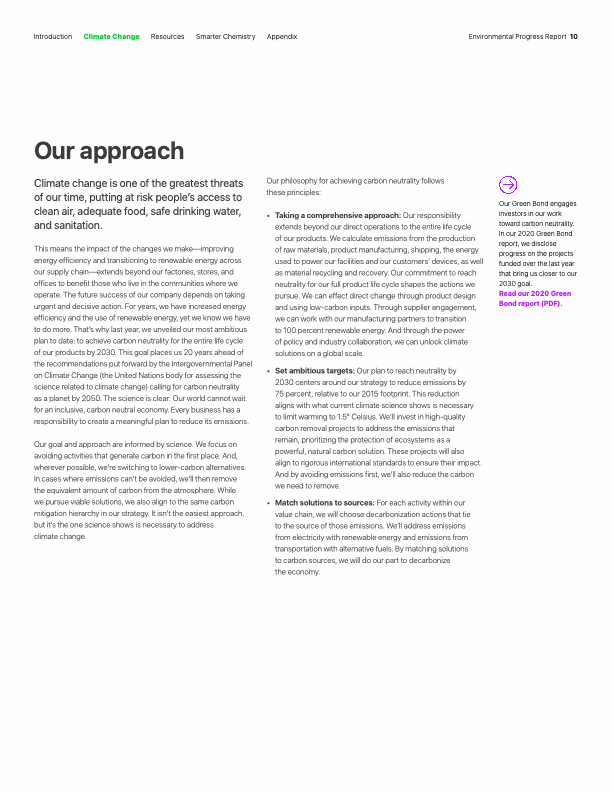

In [13]:
im = page.to_image()
im

Can use the image to extract the text:

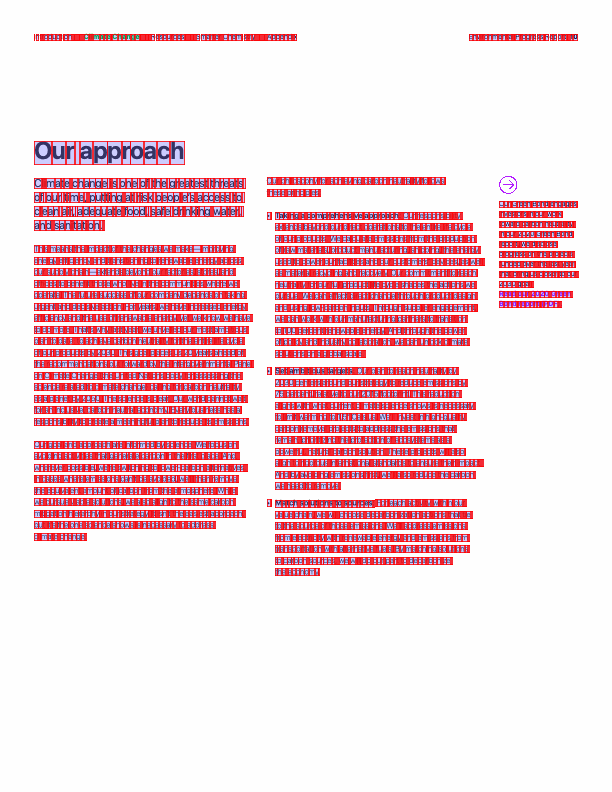

In [14]:
im.reset().draw_rects(page.chars)

In [15]:
text = page.extract_text()

In [16]:
print(text)

Introduction Climate Change Resources Smarter Chemistry Appendix Environmental Progress Report 10
Our approach
Climate change is one of the greatest threats Our philosophy for achieving carbon neutrality follows
these principles:
of our time, putting at risk people’s access to
Our Green Bond engages
clean air, adequate food, safe drinking water,
• Taking a comprehensive approach: Our responsibility investors in our work
and sanitation. extends beyond our direct operations to the entire life cycle toward carbon neutrality.
In our 2020 Green Bond
of our products. We calculate emissions from the production
report, we disclose
This means the impact of the changes we make—improving of raw materials, product manufacturing, shipping, the energy
progress on the projects
energy efficiency and transitioning to renewable energy across used to power our facilities and our customers’ devices, as well funded over the last year
our supply chain—extends beyond our factories, stores, and as material re

In [17]:
text.split('\n')

['Introduction Climate Change Resources Smarter Chemistry Appendix Environmental Progress Report 10',
 'Our approach',
 'Climate change is one of the greatest threats Our philosophy for achieving carbon neutrality follows',
 'these principles:',
 'of our time, putting at risk people’s access to',
 'Our Green Bond engages',
 'clean air, adequate food, safe drinking water,',
 '• Taking a comprehensive approach: Our responsibility investors in our work',
 'and sanitation. extends beyond our direct operations to the entire life cycle toward carbon neutrality.',
 'In our 2020 Green Bond',
 'of our products. We calculate emissions from the production',
 'report, we disclose',
 'This means the impact of the changes we make—improving of raw materials, product manufacturing, shipping, the energy',
 'progress on the projects',
 'energy efficiency and transitioning to renewable energy across used to power our facilities and our customers’ devices, as well funded over the last year',
 'our supply 

In [18]:
text.split('\n')[6]

'clean air, adequate food, safe drinking water,'